# Projet Kickstarter

## _Prédiction du succès d'une compagne de financenement sur KickStarter_
- Partie 1 : Analyse exploratoire des données
- Partie 2 : Processing des données
- Partie 3 : Enrichissement du dataset : WebScraping
- **Partie 4 : Analyse statistique et Data Visualisation**
- Partie 5 : Machine Learning

<hr/>


## Partie 2 : Analyse statistique et Data Visualisation

> Nous allons récupérer le fichier `'dataset_kickstarter_full.csv'` enregistré dans la partie 3

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kickstarter
sns.set_theme()

data = pd.read_csv('dataset_kickstarter_full.csv', index_col=0)
data.head()

,lancement,annee,mois,jour,heure,jour_semaine,proj_id,proj_name,proj_desc_len,country,...,spot_light,nbr_backers,pledged,cat_id,cat_prim,cat_name,crea_id,crea_name,success,coup_de_coeur
0,2009-04-25 15:36:21,2009,4,25,15,5,70,Offline Wikipedia iPhone app,133,the United States,...,True,25,145.0,51,Technology,Software,473191023,Dan Phiffer,1,1
1,2009-04-28 11:55:41,2009,4,28,11,1,73,New York Makes a Book!!,146,the United States,...,True,110,3329.0,13,Journalism,others,1504593825,We Make a Book,1,1
2,2009-04-29 11:52:03,2009,4,29,11,2,91,Crossword Puzzles!,149,the United States,...,True,163,2265.0,274,Games,Puzzles,86271481,Eric Berlin,1,1
3,2009-04-29 20:08:13,2009,4,29,20,2,93,Smogr Alert Field Recording,135,the United States,...,False,3,41.0,27,Design,Graphic Design,732149585,Randy Plemel,0,0
4,2009-04-29 21:11:15,2009,4,29,21,2,97,Icons for your iPhone apps,132,the United States,...,True,98,1820.0,51,Technology,Software,1948364894,Joseph Wain,1,1


### Visualisation du nombre de projets par année

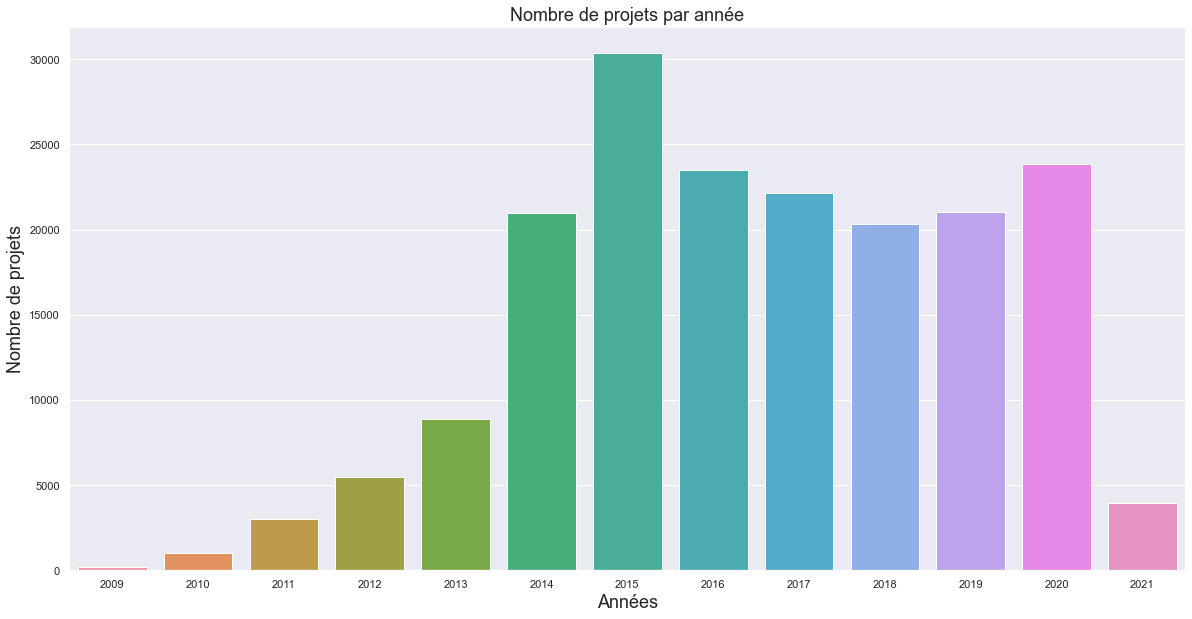

In [2]:
plt.figure(figsize=(20,10));
sns.countplot(x=data.annee);
plt.title('Nombre de projets par année', fontsize=18);
plt.ylabel('Nombre de projets', fontsize=18);
plt.xlabel('Années', fontsize=18);  

> Nous constatons une forte croissance du nombre de projet entre 2009 et 2015, puis une chute entre 2015 et 2018, puis une recroissance en 2020.
>
> Pour l'année 2021, seuls les projets du 1er Janvier au 11 Février sont représentés dans le dataset

### Nombre de donateurs par année

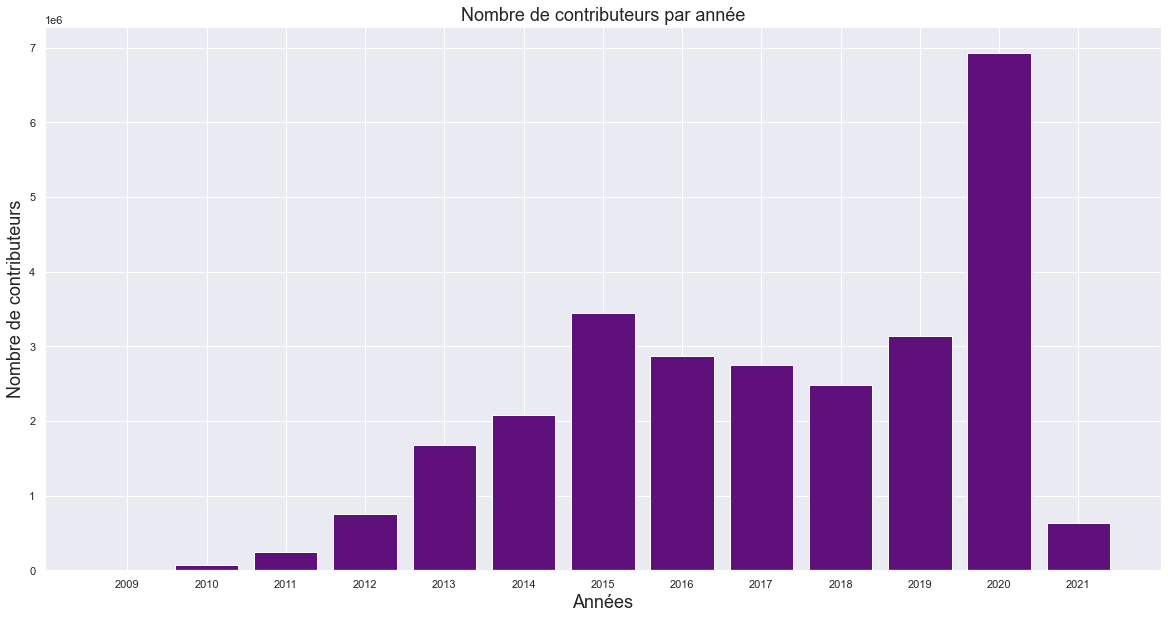

In [3]:
# Evolution du nombre de donateurs par année
df_an_sum = data.groupby('annee', as_index=False).sum()



plt.figure(figsize=(20,10));
plt.bar(df_an_sum.annee, df_an_sum.nbr_backers, color='#5F107A');
plt.title('Nombre de contributeurs par année', fontsize=18);
plt.ylabel('Nombre de contributeurs', fontsize=18);
plt.xlabel('Années', fontsize=18);    
plt.xticks(np.arange(2009,2022), np.arange(2009,2022));

> Comme pour le nombre de projets, le nombre de contributeurs présente une nette croissance entre 2009 et 2015, puis une légère baisse jusqu'en 2019 ou il reprend sa croissance pour atteindre un boom en 2020 avec près de 7 millions de contribteurs.

### Evolution des donations

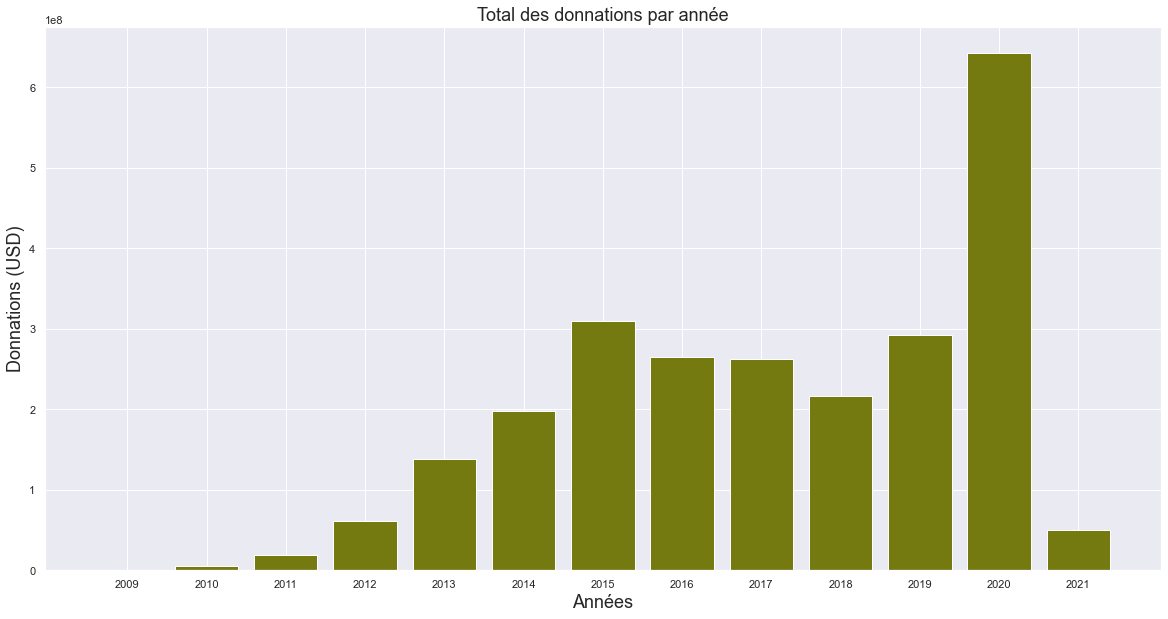

In [4]:
# Evolution des donnations en USD
plt.figure(figsize=(20,10));
plt.bar(df_an_sum.annee, df_an_sum.pledged, color='#757A10');
plt.title('Total des donnations par année', fontsize=18);
plt.ylabel('Donnations (USD)', fontsize=18);
plt.xlabel('Années', fontsize=18);    
plt.xticks(np.arange(2009,2022), np.arange(2009,2022));

> Nous constatons que le total des donnations est proportionnel au nombre de contributeurs, avec un max atteint en 2020 avec près de 650 millions de dollars. 

### Evolution du nombre de donateurs moyen par projet

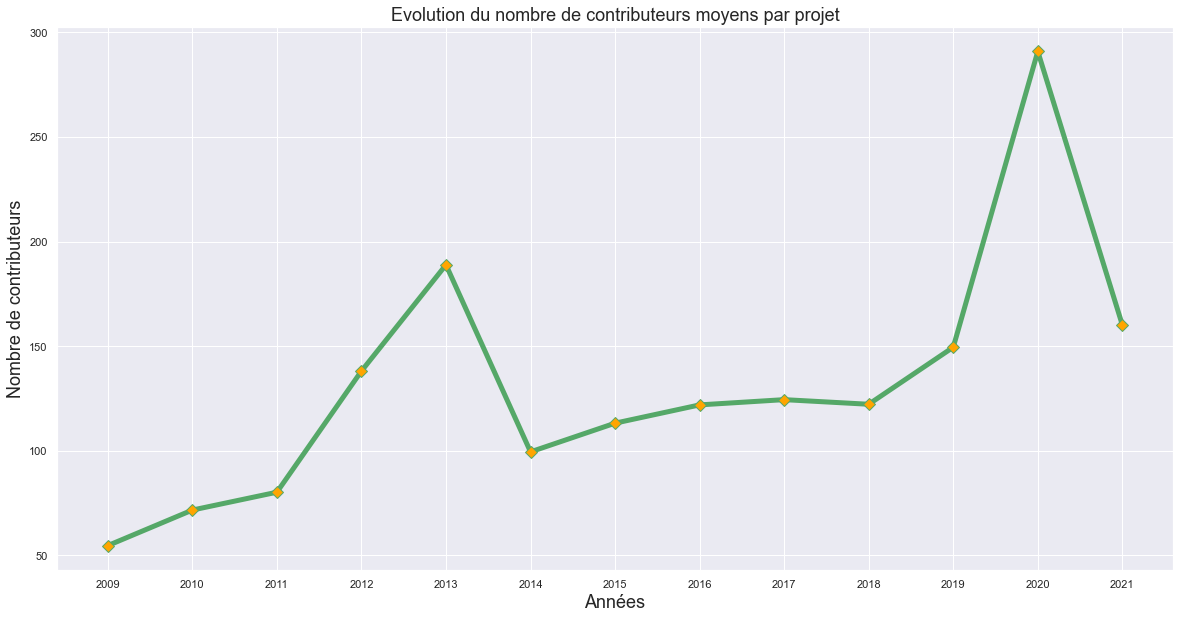

In [5]:
# Evolution du nombre de donnateurs par projet et année en USD
plt.figure(figsize=(20,10));
plt.plot(df_an_sum.annee, df_an_sum.nbr_backers/df_an_sum.nbr, 'g-', linewidth=5, marker= 'D', markersize=8, mfc='orange');
plt.title('Evolution du nombre de contributeurs moyens par projet', fontsize=18);
plt.ylabel('Nombre de contributeurs', fontsize=18);
plt.xlabel('Années', fontsize=18);    
plt.xticks(np.arange(2009,2022), np.arange(2009,2022));

>De ce graphique on peut en déduire :  
> - Une croissance de 57% en 2011 par rapport à 2009 
> - Une croissance de 120% en 2013 par rapport à 2011
> - Une chute du nombre de contributeurs de -44%  en 2014 par rapport à 2013
> - Une croissance de 50% en 2019 par rapport à 2014.
> - Une croissance de 93% en 2020 par rapport à 2019
> 
> Ce qui donne une croissance moyenne de 22.6% par an entre 2009 et 2020.

### Evolution de la donation moyenne par projet

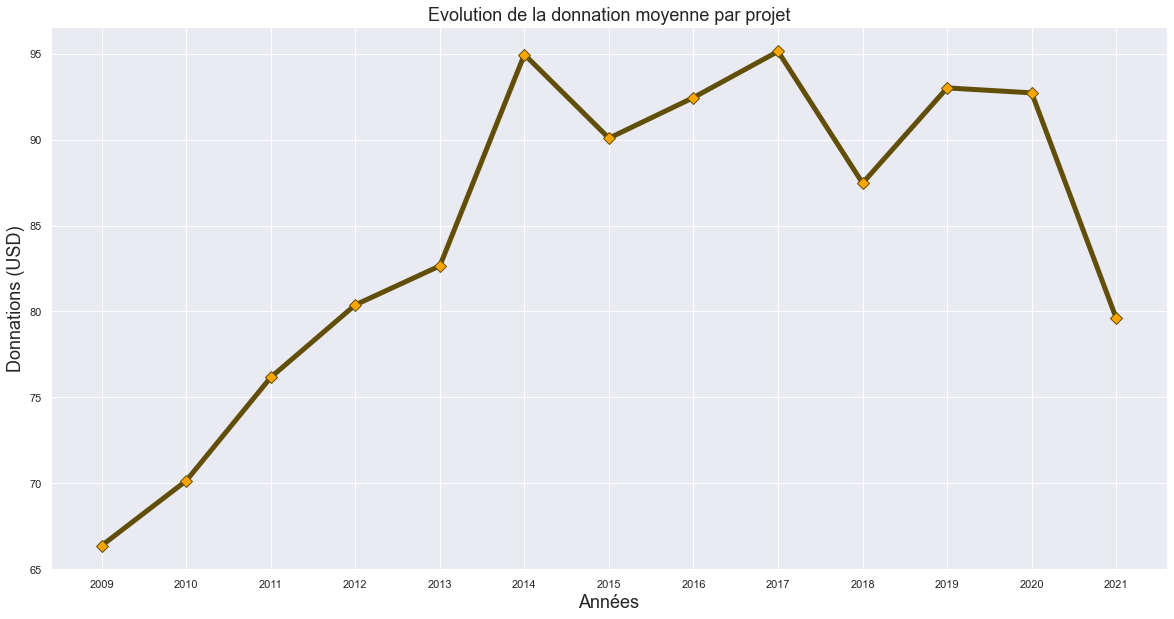

In [6]:
# Evolution des donnations moyennes par donateurs et année en USD
plt.figure(figsize=(20,10));
plt.plot(df_an_sum.annee, df_an_sum.pledged/df_an_sum.nbr_backers, c='#614F09', ls='-', linewidth=5, marker= 'D', markersize=8, mfc='orange');
plt.title('Evolution de la donnation moyenne par projet', fontsize=18);
plt.ylabel('Donnations (USD)', fontsize=18);
plt.xlabel('Années', fontsize=18);    
plt.xticks(np.arange(2009,2022), np.arange(2009,2022));

### Taux de réussite des projets

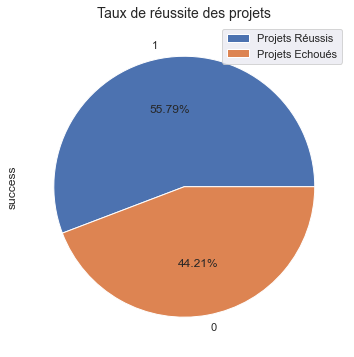

In [7]:
plt.figure(figsize=(6,6))
data.success.value_counts(normalize=True).plot.pie(autopct = lambda x:str(round(x,2))+'%');
plt.legend(['Projets Réussis','Projets Echoués'])
plt.title('Taux de réussite des projets', fontsize=14);

> De ce graphique, nous constatons que la répartition des projets réussis et échoués est équilibrée avec un taux de réussite des projets un peu plus elevé que le taux d'échecs.

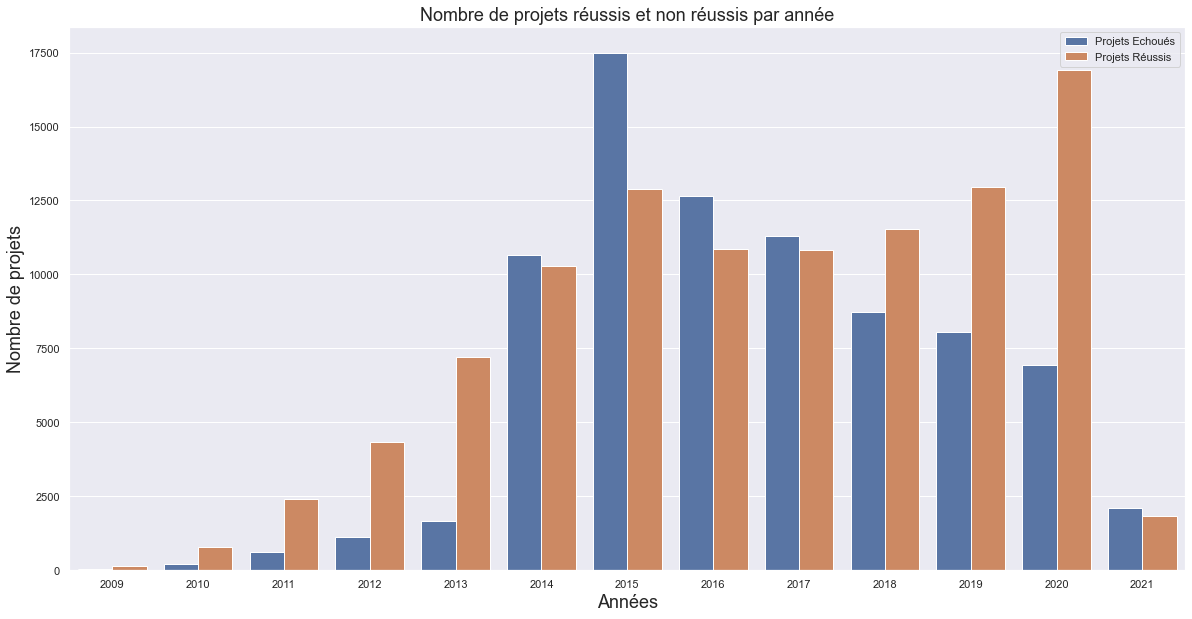

In [8]:
plt.figure(figsize=(20,10));
sns.countplot(x=data.annee, hue=data.success);
plt.title('Nombre de projets réussis et non réussis par année', fontsize=18);
plt.legend(['Projets Echoués', 'Projets Réussis'])
plt.ylabel('Nombre de projets', fontsize=18);
plt.xlabel('Années', fontsize=18);    

### Nombre de projets et taux de réussite par pays

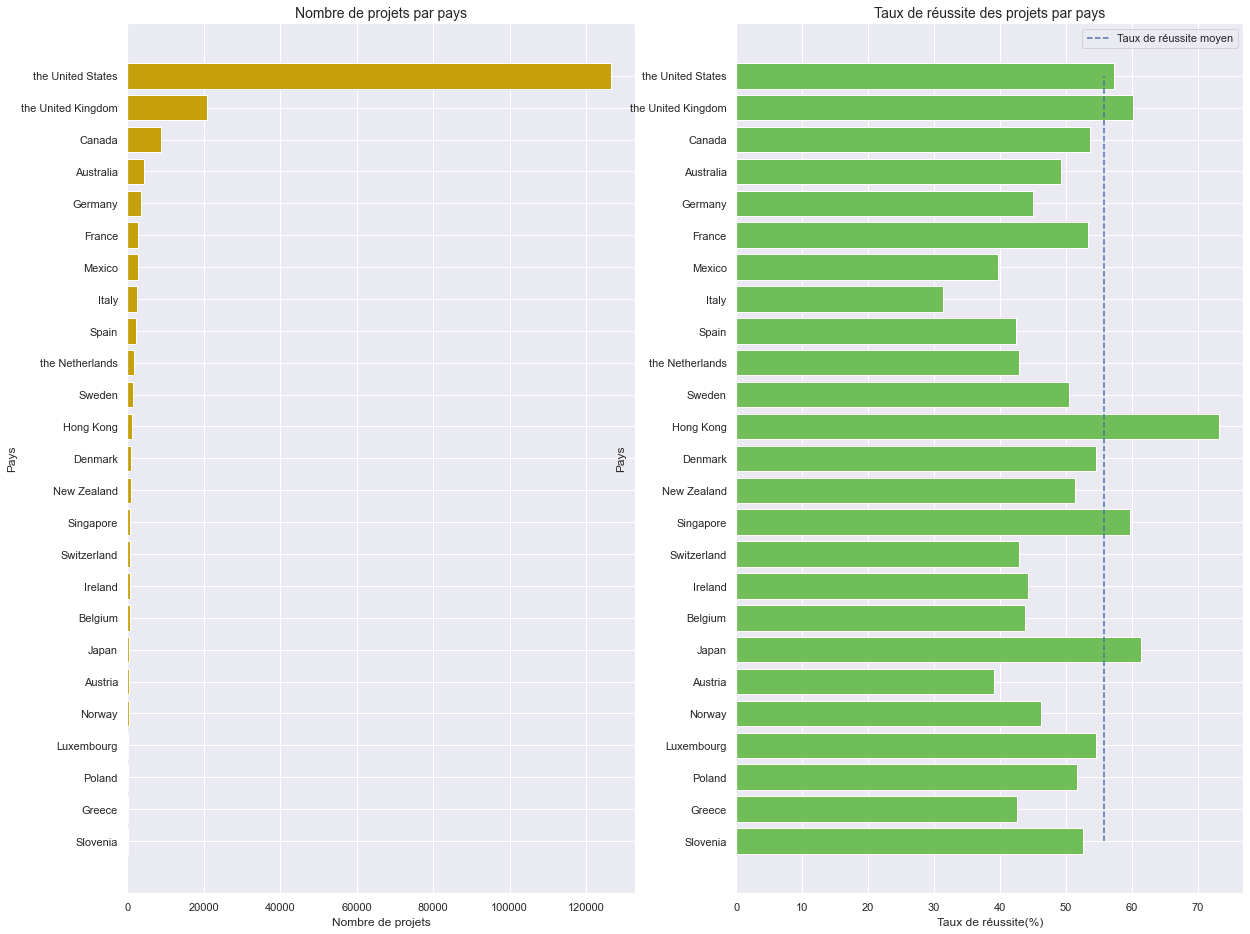

In [9]:
pays_stats = kickstarter.donnees_pays(data)
plt.figure(figsize=(20,16))
plt.subplot(121)
plt.barh(np.arange(len(pays_stats['country'])),
         pays_stats['proj_total'],   
         #cat_stats['nbr'],
         color='#C7A10D',
         align='center'
            );
plt.yticks(range(len(pays_stats['country'])), pays_stats['country']);
plt.title('Nombre de projets par pays', fontsize=14);
plt.xlabel('Nombre de projets');
plt.ylabel('Pays');

# taux de réussite des projets de chaque catégorie
plt.subplot(122)
yo = range(len(pays_stats['country']))
xo = np.ones(len(pays_stats['country']))*55.79
plt.vlines(55.79,ymin=0, ymax=len(pays_stats['country'])-1, linestyles='dashed', label='Taux de réussite moyen')


plt.barh(np.arange(len(pays_stats['country'])),
         pays_stats['taux_success'],   
         color='#6FBE57',
         align='center'
            );
plt.legend()
plt.yticks(range(len(pays_stats['country'])), pays_stats['country']);
plt.title('Taux de réussite des projets par pays', fontsize=14);
plt.xlabel('Taux de réussite(%)');
plt.ylabel('Pays');

> De ces deux graphiques on peut constater : 
> - Les Etats Unis arrivent en tête du classement des pays avec le plus grand nombre de projets (126452) soit plus 68% du total des projets, avec un taux de réussite de 57%
> - Hong Kong représente le pays avec le taux de réussite le plus important (73%), mais avec un nombre de projets très faible (~1300 projets) 
> Seulement 5 pays obtiennent un taux de réussite des projets supérieur au taux de réussite moyen.


### Nombre de projets et taux de réussite par catégories

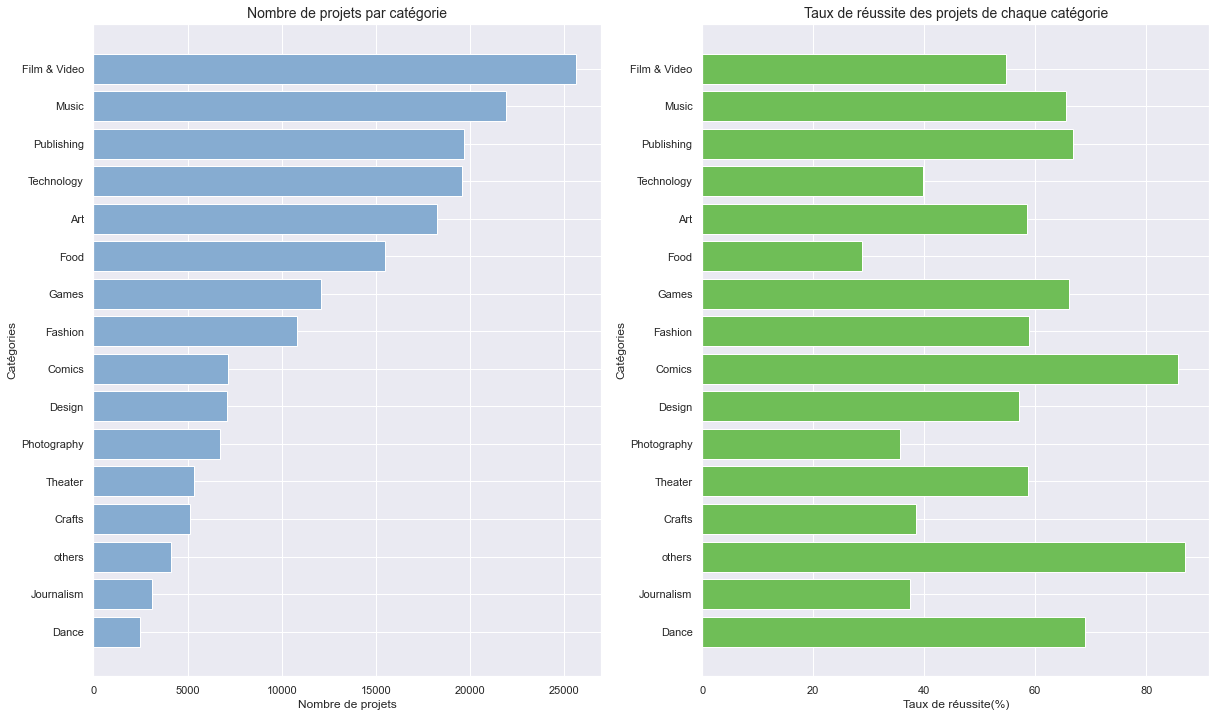

In [10]:
# Top des catégories les plus populaires
cat_stats = kickstarter.donnees_cat(data)
plt.figure(figsize=(20,12))
plt.subplot(121)
plt.barh(np.arange(len(cat_stats['categorie'])),
         cat_stats['proj_total'],   
         #cat_stats['nbr'],
         color='#86ACD1',
         align='center'
            );
plt.yticks(range(len(cat_stats['categorie'])), cat_stats['categorie']);
plt.title('Nombre de projets par catégorie', fontsize=14);
plt.xlabel('Nombre de projets');
plt.ylabel('Catégories');

# taux de réussite des projets de chaque catégorie
plt.subplot(122)
plt.barh(np.arange(len(cat_stats['categorie'])),
         cat_stats['taux_success'],   
         color='#6FBE57',
         align='center'
            );
plt.yticks(range(len(cat_stats['categorie'])), cat_stats['categorie']);
plt.title('Taux de réussite des projets de chaque catégorie', fontsize=14);
plt.xlabel('Taux de réussite(%)');
plt.ylabel('Catégories');

> - La catégorie `Film & video` arrive en tête plus de 25640 projets avec un taux de réussite de 57%
> - La catégorie `Others` présente le meilleur taux de réussite avec un taux de 87%, suivi de la catégorie `Comics` avec un taux de réussite de 85%
> - La catégorie `Food` quant à elle représente la catégorie avec le plus faible taux de réussite avoisinant les 28%
 

### Nombre de contributeurs moyens et moyenne des donnations par projet en fonction des catégories

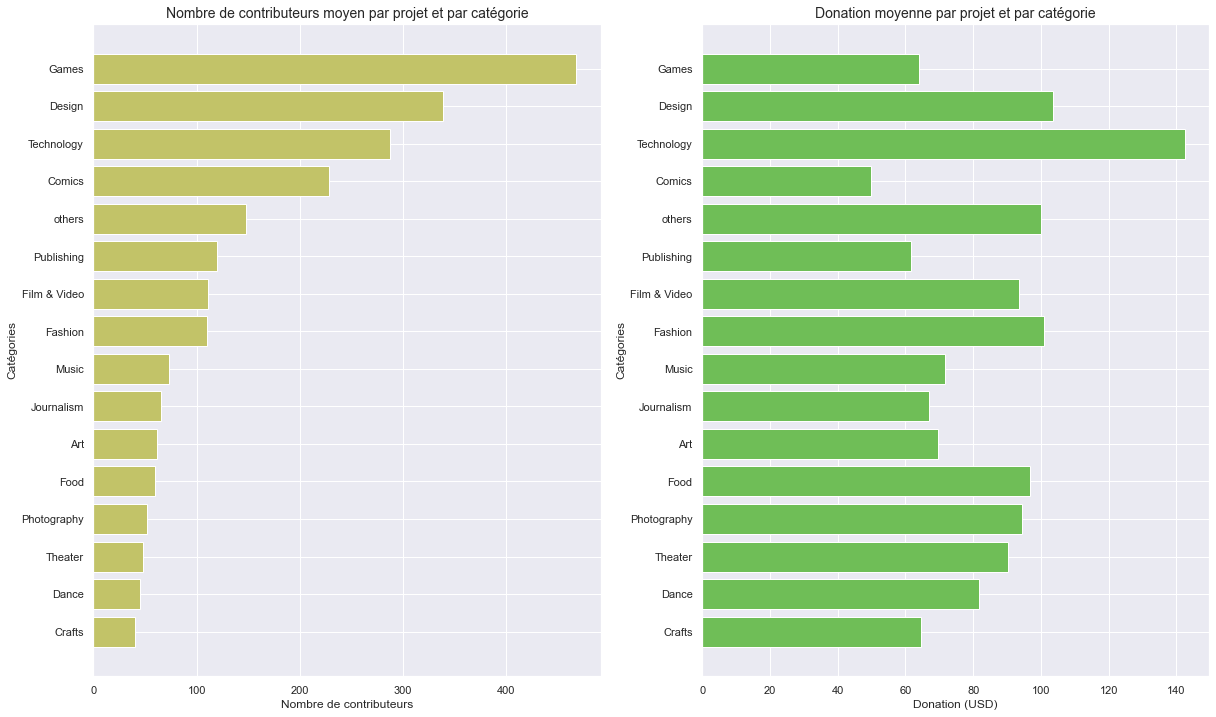

In [11]:
cat_stats = cat_stats.sort_values(by='donateurs_moy', ascending=True)
# Nombre de donateurs moyens par catégorie
plt.figure(figsize=(20,12))
plt.subplot(121) 
plt.barh(np.arange(len(cat_stats['categorie'])),
         cat_stats['donateurs']/cat_stats['nbr'],   
         color='#C2C368',
         align='center'
            );
plt.yticks(range(len(cat_stats['categorie'])), cat_stats['categorie']);
plt.title('Nombre de contributeurs moyen par projet et par catégorie', fontsize=14);
plt.xlabel('Nombre de contributeurs');
plt.ylabel('Catégories');

# Moyenne des dons pour chaque catégorie 
plt.subplot(122)
plt.barh(np.arange(len(cat_stats['categorie'])),
         cat_stats['pledged']/cat_stats['donateurs'],   
         #cat_stats['pledged_moy'],
         color='#6FBE57',
         align='center'
            );
plt.yticks(range(len(cat_stats['categorie'])), cat_stats['categorie']);
plt.title('Donation moyenne par projet et par catégorie', fontsize=14);
plt.xlabel('Donation (USD)');
plt.ylabel('Catégories');


> - La catégorie `Games` arrive en tête du classement en terme de nombre de contributeurs par projet, avec 468 contributeurs en moyennes, mais avec une donnation moyenne 64 Dollars par contributeur et par projet
> - La catégorie `Technology`, est la 3eme en terme de contributeurs par projet avec 287 contribteurs en moyenne, mais avec la plus importante donnation moyenne qui est de 142 Dollars par contributeur et par projet

### Influence du badge `Nos coups de coeur` sur la réussite des projets

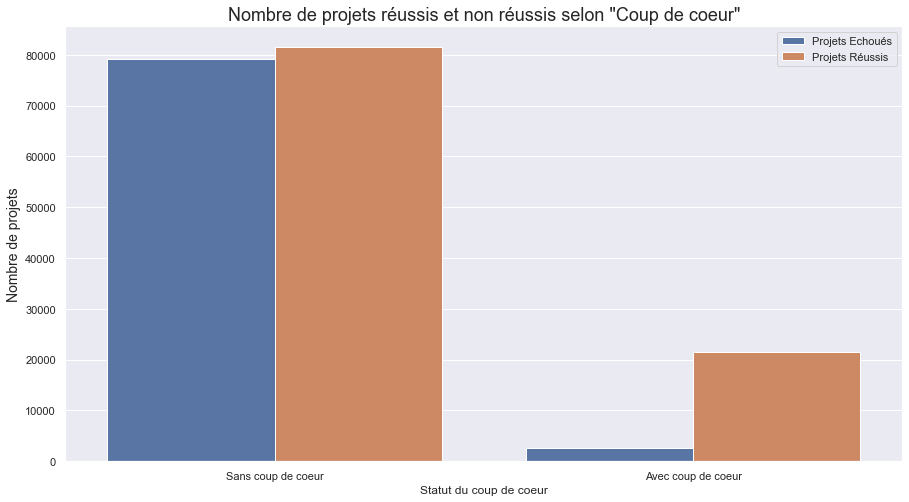

In [12]:
plt.figure(figsize=(15,8));
#sns.countplot(x=data_x.success, hue=data_x.coup_de_coeur);
sns.countplot(x=data.coup_de_coeur, hue=data.success);
plt.title('Nombre de projets réussis et non réussis selon "Coup de coeur"', fontsize=18);
#plt.legend(['Sans coup de coeur','Avec Coup de coeur'])
plt.legend(['Projets Echoués', 'Projets Réussis'])
plt.ylabel('Nombre de projets', fontsize=14);
#plt.xlabel('Statut du projet', fontsize=14);   
plt.xlabel('Statut du coup de coeur')
plt.xticks([0,1], ['Sans coup de coeur', 'Avec coup de coeur']);

> Pour les projets ne disposant pas du badge `Nos coups de coeur`, le taux de réussite est de 51%, alors que pour les projet disposant du badge `Nos coups de coeur`, le taux de réussite est de 90%.  